# Automobile Data Analysis

In [54]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Read the data.
colnames = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
            "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
            "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
            "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('./data/automobile_data.data', header=None, names=colnames)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Data Preprocessing
In the dataset, the missing values are represented with '?'. Replace the '?' with `NaN`.

In [56]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Convert Data Types
Some features need to be converted to the correct data type.

In [57]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [62]:
# Convert objects to numeric
def to_num(dataframe,colname):
    """
    Convert column of dataframe to numeric type.
    """
    dataframe[colname] = pd.to_numeric(dataframe[colname])
    
to_convert = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
(to_num(df,i) for i in to_convert)

<generator object <genexpr> at 0x1a251a77d0>

In [63]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Missing Value Imputation

In [64]:
# Which columns have NaNs?
df.isna().sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [65]:
# Make a copy of the original dataset
df_copy = df.copy()

#### Impute numerical features using KNN Imputer

In [66]:
from sklearn.impute import KNNImputer

# Extract numeric columns
df_num = df.select_dtypes(include=np.number)
df_copy_num = df_copy.select_dtypes(include=np.number)

# Fit & transform imputer using original dataset
imp_num = KNNImputer(n_neighbors=5, weights="uniform")
imp_num.fit_transform(df_num)

# Replace numeric variables with imputated values in the copied data
df_copy[df_copy_num.columns] = imp_num.transform(df_copy_num)

In [67]:
df_copy.isna().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Impute categorical features using most frequent values

In [69]:
from sklearn.impute import SimpleImputer

# Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_copy_cat = df_copy.select_dtypes(include='object')

# Fit & transform imputer using original dataset
imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit_transform(df_cat)

# Replace categorical variables with imputated values in the copied data
df_copy[df_copy_cat.columns] = imp_cat.transform(df_copy_cat)

In [86]:
df_copy.isna().sum(axis=0) # No more missing values!

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Exploratory Data Analysis & Visualizations

### Scatter Matrix

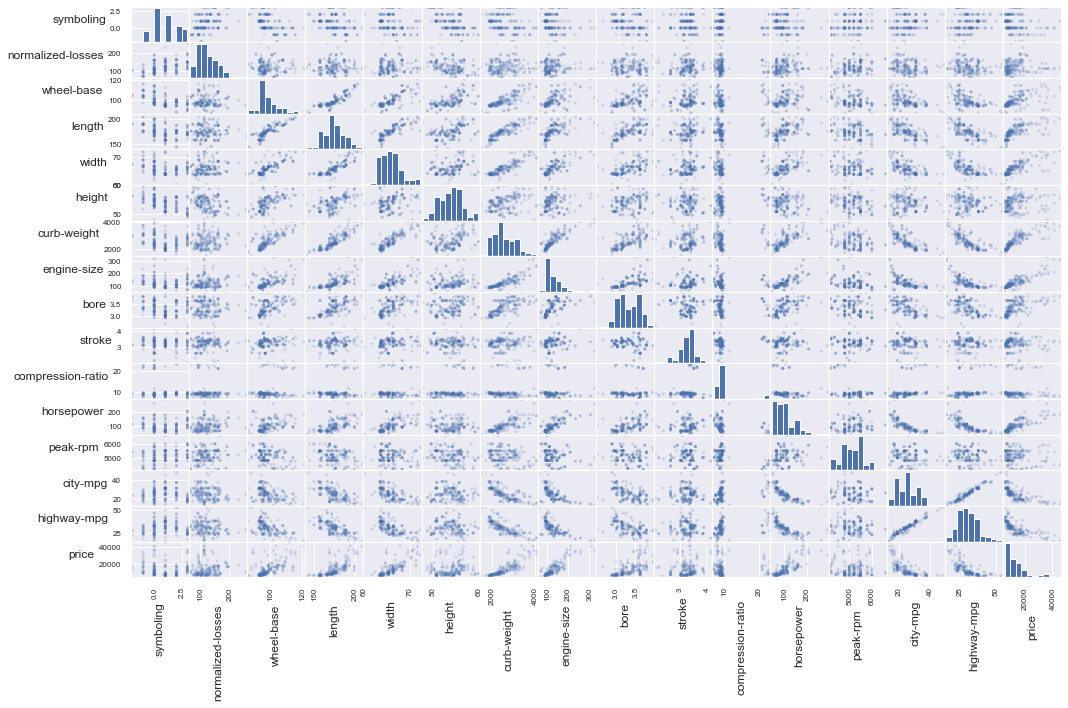

In [90]:
from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(df_copy, alpha=0.2, figsize=(15,10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Normalized Losses by Body Style

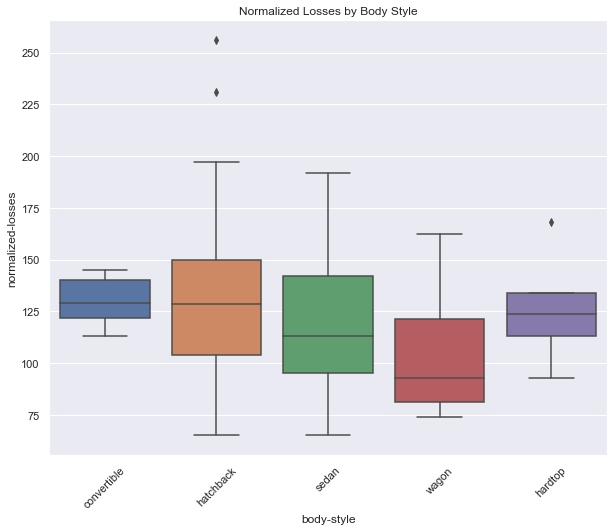

In [115]:
plt.figure(figsize=(10,8))
sns.boxplot(x='body-style', y='normalized-losses', data=df_copy)
plt.xticks(rotation=45)
plt.title('Normalized Losses by Body Style')
plt.show()

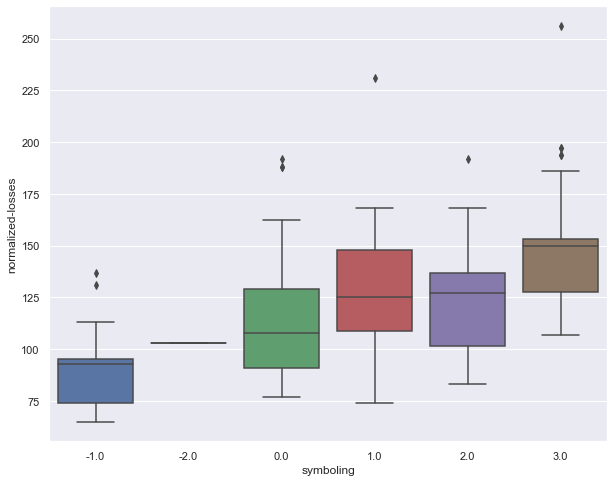

In [120]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_copy['symboling'].astype(str),y=df_copy['normalized-losses'])

<Figure size 720x576 with 0 Axes>

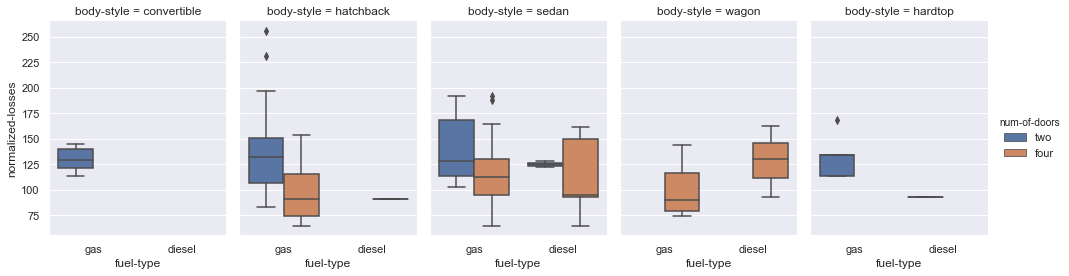

In [142]:
plt.figure(figsize=(10,8))
sns.catplot(x='fuel-type', y='normalized-losses',
                hue='num-of-doors', col='body-style',
                data=df_copy, kind="box",
                col_wrap = 5,
                height=4, aspect=.7);

## Analysis
Ideas
* predict price based on features